Chapter 31
# 三元二次型
Book_2《可视之美》 | 鸢尾花书：从加减乘除到机器学习  

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from sympy import symbols, simplify, expand, lambdify, diff

## 自定义函数

In [21]:
# 定义三元二次型
def fcn_3(A,xxx1,xxx2,xxx3):
    x1,x2,x3 = symbols('x1 x2 x3')

    x = np.array([[x1,x2,x3]]).T

    f_x = x.T@A@x
    print(simplify(expand(f_x[0][0])))
    
    f_x_fcn = lambdify([x1,x2,x3],f_x[0][0])
    
    fff = f_x_fcn(xxx1,xxx2,xxx3)
    
    return fff

In [5]:
def fcn_n_grdnt(A, xxx1, xxx2, xxx3):

    x1,x2,x3 = symbols('x1 x2 x3')
    # 符号向量
    x = np.array([[x1,x2,x3]]).T
    # 二次型
    f_x = x.T@A@x
    f_x = f_x[0][0]
    print(simplify(expand(f_x)))

    # 计算梯度，符号
    grad_f = [diff(f_x,var) for var in (x1,x2,x3)]
    
    # 计算二元函数值 f(x1, x2)
    f_x_fcn = lambdify([x1,x2,x3],f_x)
    ff_x = f_x_fcn(xxx1,xxx2,xxx3)

    # 梯度函数
    grad_fcn = lambdify([x1,x2,x3],grad_f)
    
    # 采样，降低颗粒度
    xxx1_ = xxx1[::20,::20]
    xxx2_ = xxx2[::20,::20]
    xxx3_ = xxx3[::20,::20]
    
    # 计算梯度
    V = grad_fcn(xxx1_,xxx2_,xxx3_)
    
    # 修复梯度值
    if isinstance(V[0], int):
        V[0] = np.zeros_like(xxx1_)
        
    if isinstance(V[1], int):
        V[1] = np.zeros_like(xxx1_)

    if isinstance(V[2], int):
        V[2] = np.zeros_like(xxx1_)
        
    return ff_x, V

## 创建数据

In [ ]:
x1_array = np.linspace(-2,2,101)
x2_array = np.linspace(-2,2,101) 
x3_array = np.linspace(-2,2,101) 

xxx1, xxx2, xxx3 = np.meshgrid(x1_array, x2_array, x3_array)

In [6]:
A = np.array([[1, 0, 0],
              [0, 0, 0],
              [0, 0, -1]])

# 计算矩阵秩
print(np.linalg.matrix_rank(A))

2


In [22]:
f3_array = fcn_3(A,xxx1,xxx2,xxx3)

x1**2 - x3**2


In [19]:
# ff_x, V = fcn_n_grdnt(A, xxx1, xxx2, xxx3)

In [ ]:
# import seaborn as sns
# iris_df = sns.load_dataset("iris")
# A = iris_df.cov().to_numpy()
# A = A[0:-1][:,0:-1]
# A = np.linalg.inv(A)

## Plotly Volume

In [1]:
# data=go.Volume(
#     x=xxx1[::20,::20,::20].flatten(),
#     y=xxx2[::20,::20,::20].flatten(),
#     z=xxx3[::20,::20,::20].flatten(),
#     value=f3_array.flatten(),
#     isomin=f3_array.min(),
#     isomax=f3_array.max(),
#     opacity=0.25, 
#     colorscale = 'RdYlBu_r',
#     surface_count=20, 
#     )

# # 创建布局
# layout = go.Layout(
#     width=600,   # 设置图形宽度
#     height=600,  # 设置图形高度
#     scene=dict(
#         xaxis_title='x_1',
#         yaxis_title='x_1',
#         zaxis_title='f(x_1,x_2)'))

# # 创建图形对象
# fig = go.Figure(data=data, layout=layout)
# fig.layout.scene.camera.projection.type = "orthographic"
# camera = dict(eye=dict(x=0.6, y=-1, z=0.5))
# fig.update_layout(scene_camera=camera)
# fig.show()

## 切豆腐  
请大家把如下可视化代码写成一个自定义函数

### 外立面

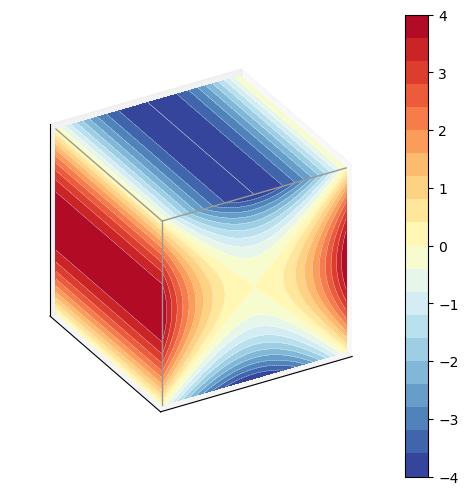

In [24]:
# 设定统一等高线分层

levels = np.linspace(f3_array.min(),f3_array.max(),21)

# 定义等高线高度

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')

# 绘制三维等高线，填充
ax.contourf(xxx1[:, :, -1], 
            xxx2[:, :, -1], 
            f3_array[:, :, -1],
            levels = levels,
            zdir='z', offset=xxx3.max(),
            cmap = 'RdYlBu_r') # RdYlBu_r

ax.contour(xxx1[:, :, -1], 
            xxx2[:, :, -1], 
            f3_array[:, :, -1],
            levels = levels,
            zdir='z', offset=xxx3.max(),
            linewidths = 0.25,
            colors = '1')

ax.contourf(xxx1[0, :, :], 
            f3_array[0, :, :], 
            xxx3[0, :, :],
            levels = levels,
            zdir='y', 
            cmap = 'RdYlBu_r',
            offset=xxx2.min())

ax.contour(xxx1[0, :, :], 
            f3_array[0, :, :], 
            xxx3[0, :, :],
            levels = levels,
            zdir='y', 
            colors = '1',
            linewidths = 0.25,
            offset=xxx2.min())


CS = ax.contourf(f3_array[:, 0, :], 
            xxx2[:, 0, :], 
            xxx3[:, 0, :],
            levels = levels,
            cmap = 'RdYlBu_r',
            zdir='x', 
            offset=xxx1.min())

ax.contour(f3_array[:, 0, :], 
            xxx2[:, 0, :], 
            xxx3[:, 0, :],
            levels = levels,
            zdir='x', 
            colors = '1',
            linewidths = 0.25,
            offset=xxx1.min())

fig.colorbar(CS, ticks=np.linspace(np.floor(f3_array.min()),np.ceil(f3_array.max()),
                                  int(np.ceil(f3_array.max()) - np.floor(f3_array.min())) + 1))
# Set limits of the plot from coord limits
xmin, xmax = xxx1.min(), xxx1.max()
ymin, ymax = xxx2.min(), xxx2.max()
zmin, zmax = xxx3.min(), xxx3.max()
ax.set(xlim=[xmin, xmax], ylim=[ymin, ymax], zlim=[zmin, zmax])

# 绘制框线
edges_kw = dict(color='0.6', linewidth=1, zorder=1e5)
# zorder 控制呈现 artist 的先后顺序
# zorder 越小，artist 置于越底层
# zorder 赋值很大的数，这样确保 zorder 置于最顶层

ax.plot([xmin, xmax], [ymin, ymin], [zmax, zmax], **edges_kw)
ax.plot([xmin, xmin], [ymin, ymax], [zmax, zmax], **edges_kw)
ax.plot([xmin, xmin], [ymin, ymin], [zmin, zmax], **edges_kw)
# ax.set_xticks([-1,0,1])
# ax.set_yticks([-1,0,1])
# ax.set_zticks([-1,0,1])

ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])

ax.view_init(azim=-120, elev=30) 
ax.set_proj_type('ortho')
# ax.set_xlabel('$x_1$')
# ax.set_ylabel('$x_2$')
# ax.set_zlabel('$x_3$')
ax.set_box_aspect((1, 1, 1))
# fig.savefig('Figures/一次函数，三元，3D外立面.svg', format='svg')

### 将等高线展开，沿x3

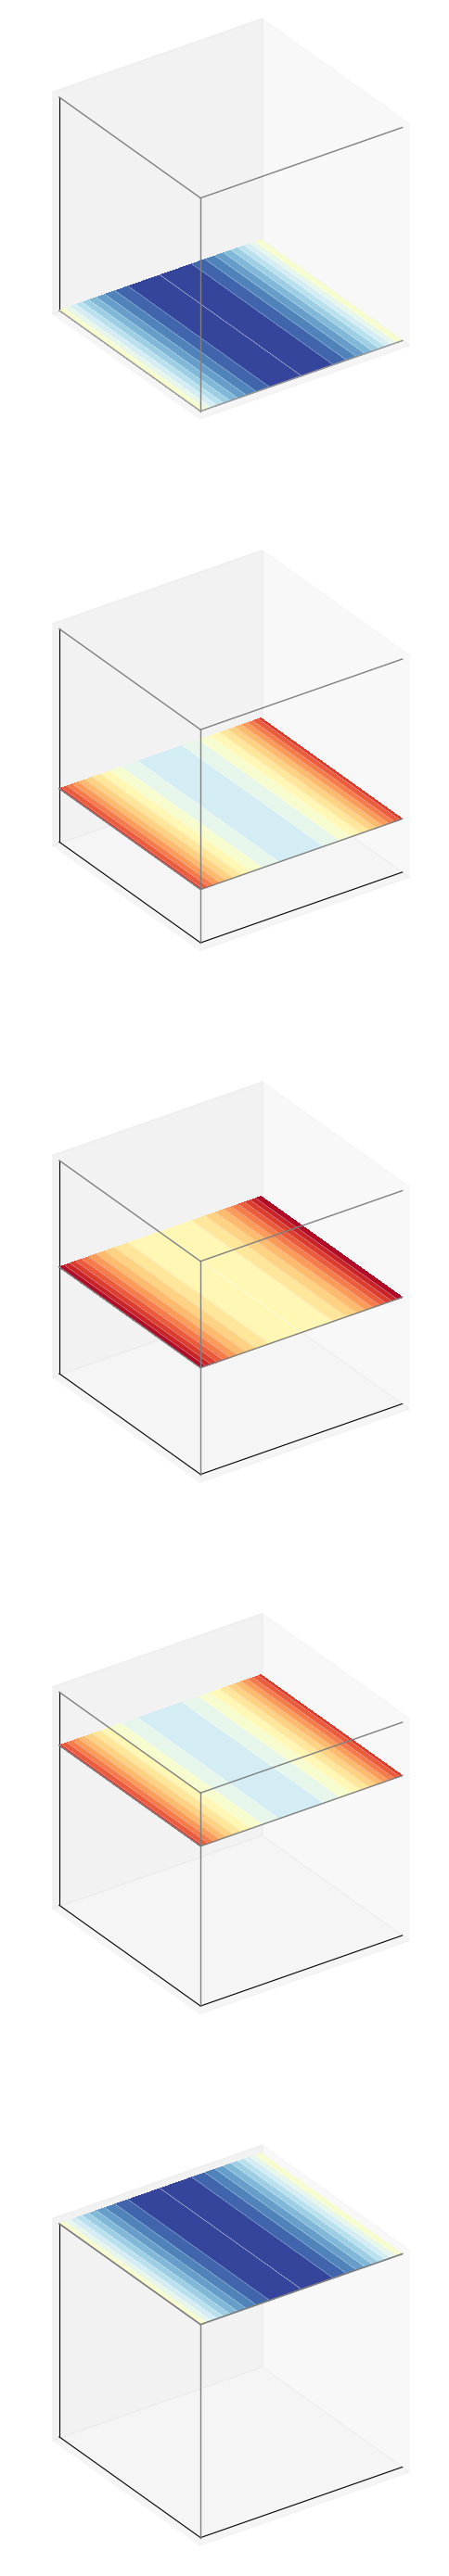

In [151]:
fig = plt.figure(figsize=(6, 36))

for fig_idx,idx in enumerate(np.arange(0,len(x3_array),25)):
    
    ax = fig.add_subplot(len(np.arange(0,len(x3_array),25)), 1, 
                         fig_idx + 1, projection='3d')
    
    x3_idx = x3_array[idx]

    ax.contourf(xxx1[:, :, idx], 
                xxx2[:, :, idx], 
                f3_array[:, :, idx],
                levels = levels,
                zdir='z', 
                offset=x3_idx,
                cmap = 'RdYlBu_r')
    
    ax.contour(xxx1[:, :, idx], 
                xxx2[:, :, idx], 
                f3_array[:, :, idx],
                levels = levels,
                zdir='z', 
                offset=x3_idx,
               linewidths = 0.25,
                colors = '1')
    
    ax.plot([xmin, xmin], [ymin, ymax], [x3_idx, x3_idx], **edges_kw)
    ax.plot([xmax, xmin], [ymin, ymin], [x3_idx, x3_idx], **edges_kw)

    ax.set(xlim=[xmin, xmax], ylim=[ymin, ymax], zlim=[zmin, zmax])

    # 绘制框线
    edges_kw = dict(color='0.5', linewidth=1, zorder=1e3)
    ax.plot([xmin, xmin], [ymin, ymin], [zmin, zmax], **edges_kw)
    ax.plot([xmin, xmin], [ymin, ymax], [zmax, zmax], **edges_kw)
    ax.plot([xmax, xmin], [ymin, ymin], [zmax, zmax], **edges_kw)

    ax.view_init(azim=-125, elev=30) 
    ax.set_box_aspect(None)
    ax.set_proj_type('ortho')
    # ax.set_xlabel('$x_1$')
    # ax.set_ylabel('$x_2$')
    # ax.set_zlabel('$x_3$')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_zticks([])
    ax.set_box_aspect((1, 1, 1))
    ax.grid(False)
# fig.savefig('Figures/一次函数，三元，沿x3分层等高线.svg', format='svg')

### 将等高线展开，沿x2

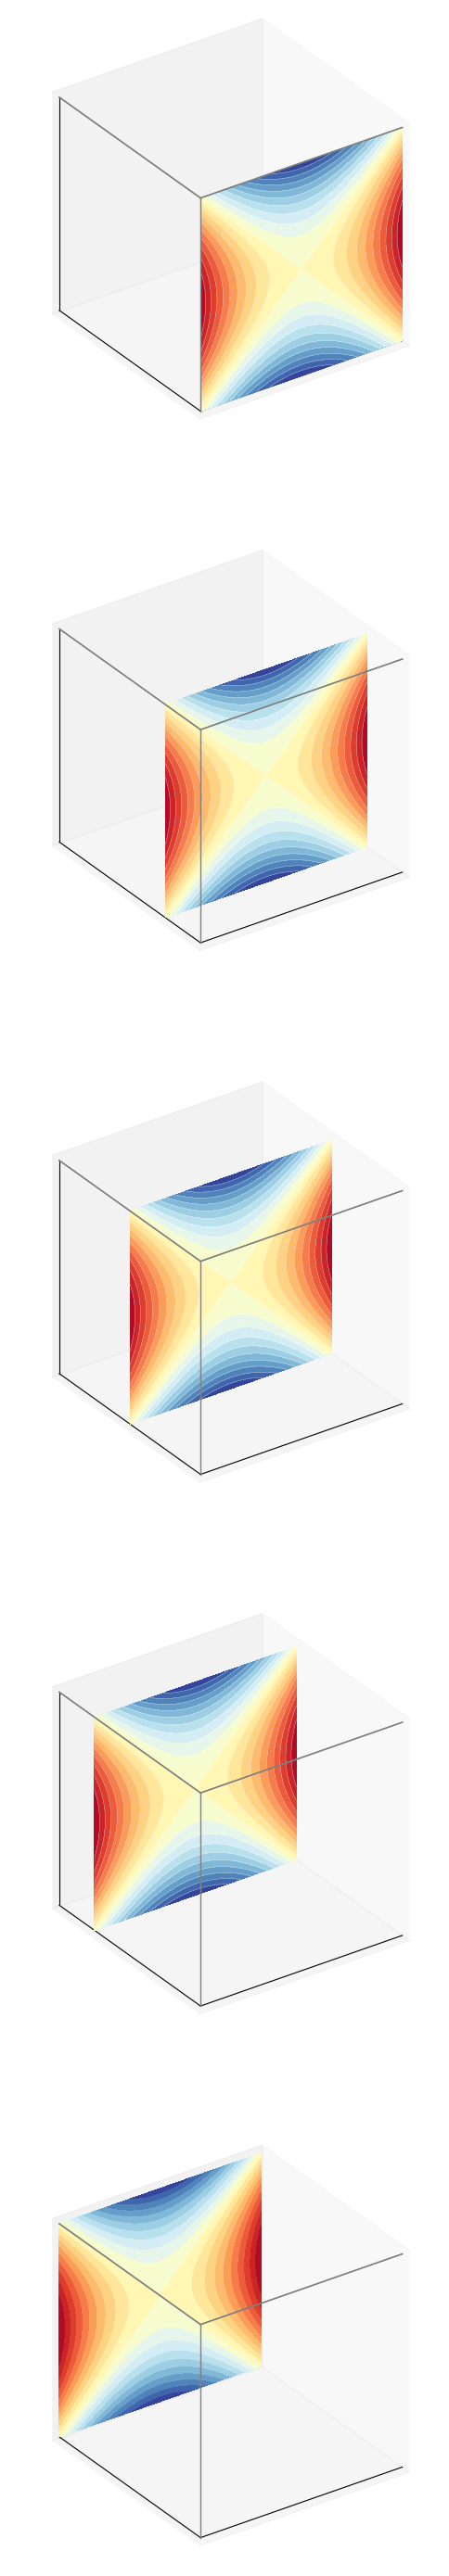

In [152]:
fig = plt.figure(figsize=(6, 36))

for fig_idx,idx in enumerate(np.arange(0,len(x2_array),25)):
    
    ax = fig.add_subplot(len(np.arange(0,len(x2_array),25)), 1, 
                         fig_idx + 1, projection='3d')
    
    x2_idx = x2_array[idx]

    ax.contourf(xxx1[idx, :, :], 
                f3_array[idx, :, :],
                xxx3[idx, :, :], 
                levels = levels,
                zdir='y', 
                offset=x2_idx,
                cmap = 'RdYlBu_r')

    ax.contour(xxx1[idx, :, :], 
                f3_array[idx, :, :],
                xxx3[idx, :, :], 
                levels = levels,
                zdir='y', 
                offset=x2_idx,
               linewidths = 0.25,
                colors = '1')
    
    ax.plot([xmin, xmin], [ymin, ymax], [x3_idx, x3_idx], **edges_kw)
    ax.plot([xmax, xmin], [ymin, ymin], [x3_idx, x3_idx], **edges_kw)

    ax.set(xlim=[xmin, xmax], ylim=[ymin, ymax], zlim=[zmin, zmax])

    # Plot edges
    edges_kw = dict(color='0.5', linewidth=1, zorder=1e3)
    ax.plot([xmin, xmin], [ymin, ymin], [zmin, zmax], **edges_kw)
    ax.plot([xmin, xmin], [ymin, ymax], [zmax, zmax], **edges_kw)
    ax.plot([xmax, xmin], [ymin, ymin], [zmax, zmax], **edges_kw)

    # Set zoom and angle view
    ax.view_init(azim=-125, elev=30) 
    ax.set_box_aspect(None)
    ax.set_proj_type('ortho')
    # ax.set_xlabel('$x_1$')
    # ax.set_ylabel('$x_2$')
    # ax.set_zlabel('$x_3$')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_zticks([])
    ax.set_box_aspect((1, 1, 1))
    ax.grid(False)
# fig.savefig('Figures/一次函数，三元，沿x2分层等高线.svg', format='svg')

### 将等高线展开，沿x1

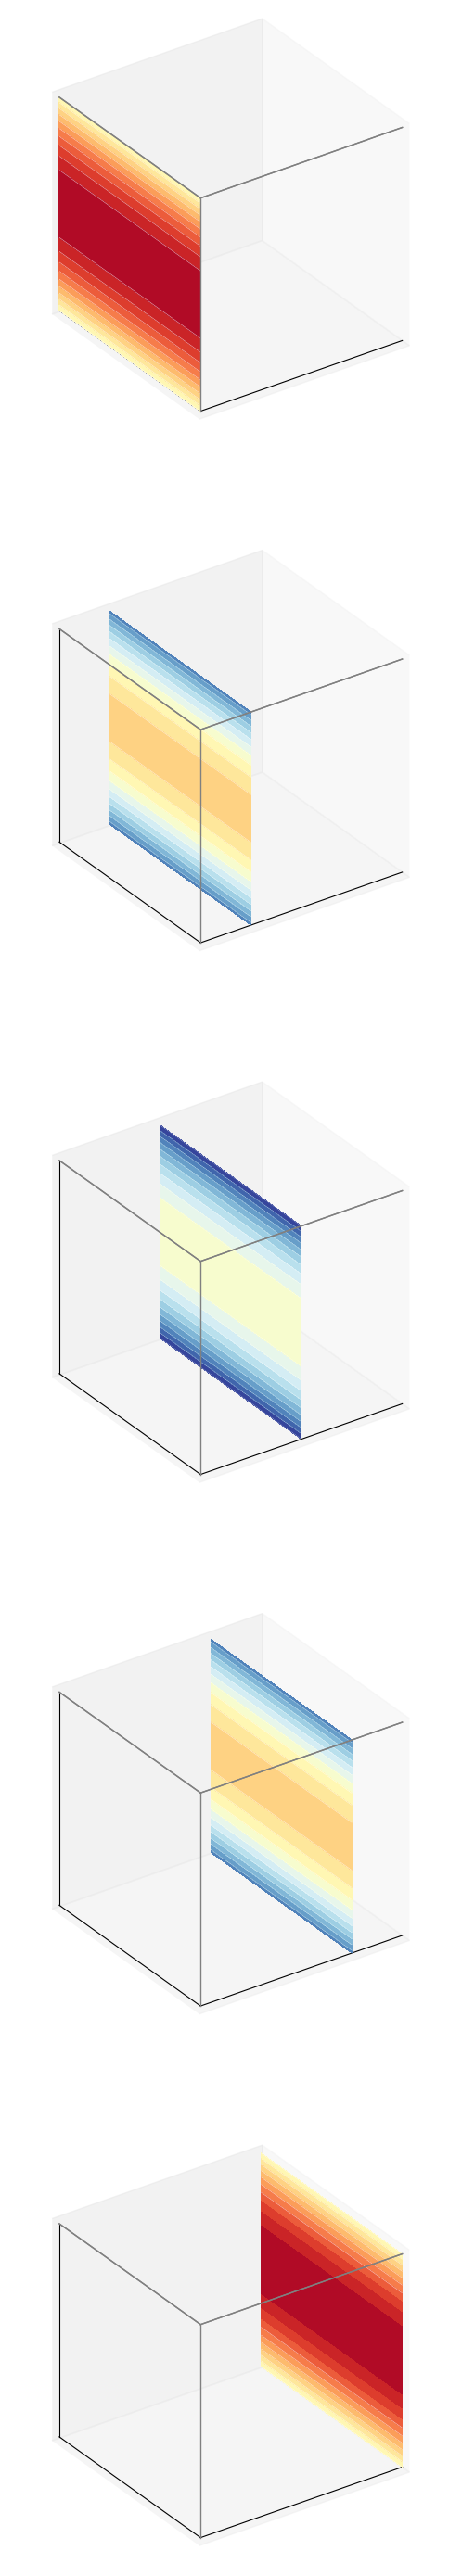

In [153]:
fig = plt.figure(figsize=(6, 36))

for fig_idx,idx in enumerate(np.arange(0,len(x1_array),25)):
    
    ax = fig.add_subplot(len(np.arange(0,len(x1_array),25)), 1, 
                         fig_idx + 1, projection='3d')
    
    x1_idx = x1_array[idx]

    ax.contourf(f3_array[:, idx, :],
                xxx2[:, idx, :], 
                xxx3[:,idx,  :], 
                levels = levels,
                zdir='x', 
                offset=x1_idx,
                cmap = 'RdYlBu_r')

    ax.contour(f3_array[:, idx, :],
                xxx2[:, idx, :], 
                xxx3[:,idx,  :], 
                levels = levels,
                zdir='x', 
                offset=x1_idx,
               linewidths = 0.25,
                colors = '1')
    
    ax.plot([xmin, xmin], [ymin, ymax], [x3_idx, x3_idx], **edges_kw)
    ax.plot([xmax, xmin], [ymin, ymin], [x3_idx, x3_idx], **edges_kw)

    ax.set(xlim=[xmin, xmax], ylim=[ymin, ymax], zlim=[zmin, zmax])

    # 绘制框线
    ax.plot([xmin, xmin], [ymin, ymin], [zmin, zmax], **edges_kw)
    ax.plot([xmin, xmin], [ymin, ymax], [zmax, zmax], **edges_kw)
    ax.plot([xmax, xmin], [ymin, ymin], [zmax, zmax], **edges_kw)

    ax.view_init(azim=-125, elev=30) 
    ax.set_box_aspect(None)
    ax.set_proj_type('ortho')
    # ax.set_xlabel('$x_1$')
    # ax.set_ylabel('$x_2$')
    # ax.set_zlabel('$x_3$')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_zticks([])
    ax.set_box_aspect((1, 1, 1))
    ax.grid(False)
# fig.savefig('Figures/一次函数，三元，沿x1分层等高线.svg', format='svg')